In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd

folder_path = '/content/drive/MyDrive/SmartCity/Station Ochtrup/'
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each CSV file and attempt to read it
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    try:
        df = pd.read_csv(file_path, delimiter = ";")
        dfs.append(df)
    except pd.errors.ParserError as e:
        print(f"Error reading {file_path}: {e}")

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)
df = combined_df.dropna()

# Convert columns to the appropriate numeric types
numeric_columns = [
    '2m Lufttemperatur [degC] (tas)',
    'spezifische Luftfeuchtigkeit [kg/kg] (huss)',
    'Niederschlagsmenge [mm] (pr)',
    'Windgeschwindigkeit in 2m [m/s] (sfcWind)',
    'maximale Windgeschwindigkeit [m/s] (wsgsmax)',
    'u-Windkomponente [m/s] (uas)',
    'v-Windkomponente [m/s] (vas)',
    'Bodenfeuchte in 5cm Tiefe [vol%]',
    'Bodenfeuchte in 15cm Tiefe [vol%]',
    'Bodenfeuchte in 30cm Tiefe [vol%]',
    'Bodenfeuchte in 60cm Tiefe [vol%]',
    'Bodentemperatur in 5cm Tiefe [degC]',
    'Bodentemperatur in 15cm Tiefe [degC]',
    'Bodentemperatur in 30cm Tiefe [degC]',
    'Bodentemperatur in 60cm Tiefe [degC]',
    'Matrixpotential in 30cm Tiefe [kPa]',
    'Bodenfeuchte aus CRNS [vol%] (mrso)'
]

for column in numeric_columns:
    # Replace commas with dots and then convert to numeric
    df[column] = pd.to_numeric(df[column].str.replace(',', '.'), errors='coerce')


# Convert 'Timestamp[UTC]' to datetime
df['Timestamp[UTC]'] = pd.to_datetime(df['Timestamp[UTC]'])

# Now, the DataFrame has the appropriate numeric types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11243 entries, 175 to 16822
Data columns (total 25 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Timestamp[UTC]                                11243 non-null  datetime64[ns]
 1   2m Lufttemperatur [degC] (tas)                11243 non-null  float64       
 2   Stations-Luftdruck [Pa] (ps)                  11243 non-null  float64       
 3   relative Luftfeuchtigkeit [%] (hurs)          11243 non-null  float64       
 4   spezifische Luftfeuchtigkeit [kg/kg] (huss)   11243 non-null  float64       
 5   Niederschlagsmenge [mm] (pr)                  11243 non-null  float64       
 6   Windgeschwindigkeit in 2m [m/s] (sfcWind)     11243 non-null  float64       
 7   Windrichtung [deg]                            11243 non-null  float64       
 8   maximale Windgeschwindigkeit [m/s] (wsgsmax)  11243 non-null  fl

<ipython-input-2-4b8dcb55f977>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_numeric(df[column].str.replace(',', '.'), errors='coerce')
<ipython-input-2-4b8dcb55f977>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp[UTC]'] = pd.to_datetime(df['Timestamp[UTC]'])


In [ ]:
#!pip install dataprep
#from dataprep.eda import create_report
#create_report(df).show()

In [ ]:
# Columns to drop
columns_to_drop = ["Neutronen Anzahl [N/h]", "Bodenfeuchte aus CRNS [vol%] (mrso)","Matrixpotential in 30cm Tiefe [kPa]", "Timestamp[UTC]", 'Bodenfeuchte in 15cm Tiefe [vol%]', 'Bodenfeuchte in 30cm Tiefe [vol%]', 'Bodenfeuchte in 60cm Tiefe [vol%]']

# Drop specified columns
df = df.drop(columns=columns_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11243 entries, 175 to 16822
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   2m Lufttemperatur [degC] (tas)                11243 non-null  float64
 1   Stations-Luftdruck [Pa] (ps)                  11243 non-null  float64
 2   relative Luftfeuchtigkeit [%] (hurs)          11243 non-null  float64
 3   spezifische Luftfeuchtigkeit [kg/kg] (huss)   11243 non-null  float64
 4   Niederschlagsmenge [mm] (pr)                  11243 non-null  float64
 5   Windgeschwindigkeit in 2m [m/s] (sfcWind)     11243 non-null  float64
 6   Windrichtung [deg]                            11243 non-null  float64
 7   maximale Windgeschwindigkeit [m/s] (wsgsmax)  11243 non-null  float64
 8   u-Windkomponente [m/s] (uas)                  11243 non-null  float64
 9   v-Windkomponente [m/s] (vas)                  11243 non-nul

In [ ]:
!pip install interpret
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show

# Assuming 'df' is your DataFrame with the cleaned and numeric data
target_column = 'Bodenfeuchte in 5cm Tiefe [vol%]'

# Define features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create ExplainableBoostingRegressor model
ebr = ExplainableBoostingRegressor()
ebr.fit(X_train, y_train)

# Predict on the test set
y_pred = ebr.predict(X_test)

# Calculate mean absolute error
mae = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mae}')

# Explain the model
ebm_global = ebr.explain_global()

# Show feature importance
show(ebm_global)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.1/247.1 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.2 MB/s eta 0:00:00
Mean Squared Error: 14.174223635762672


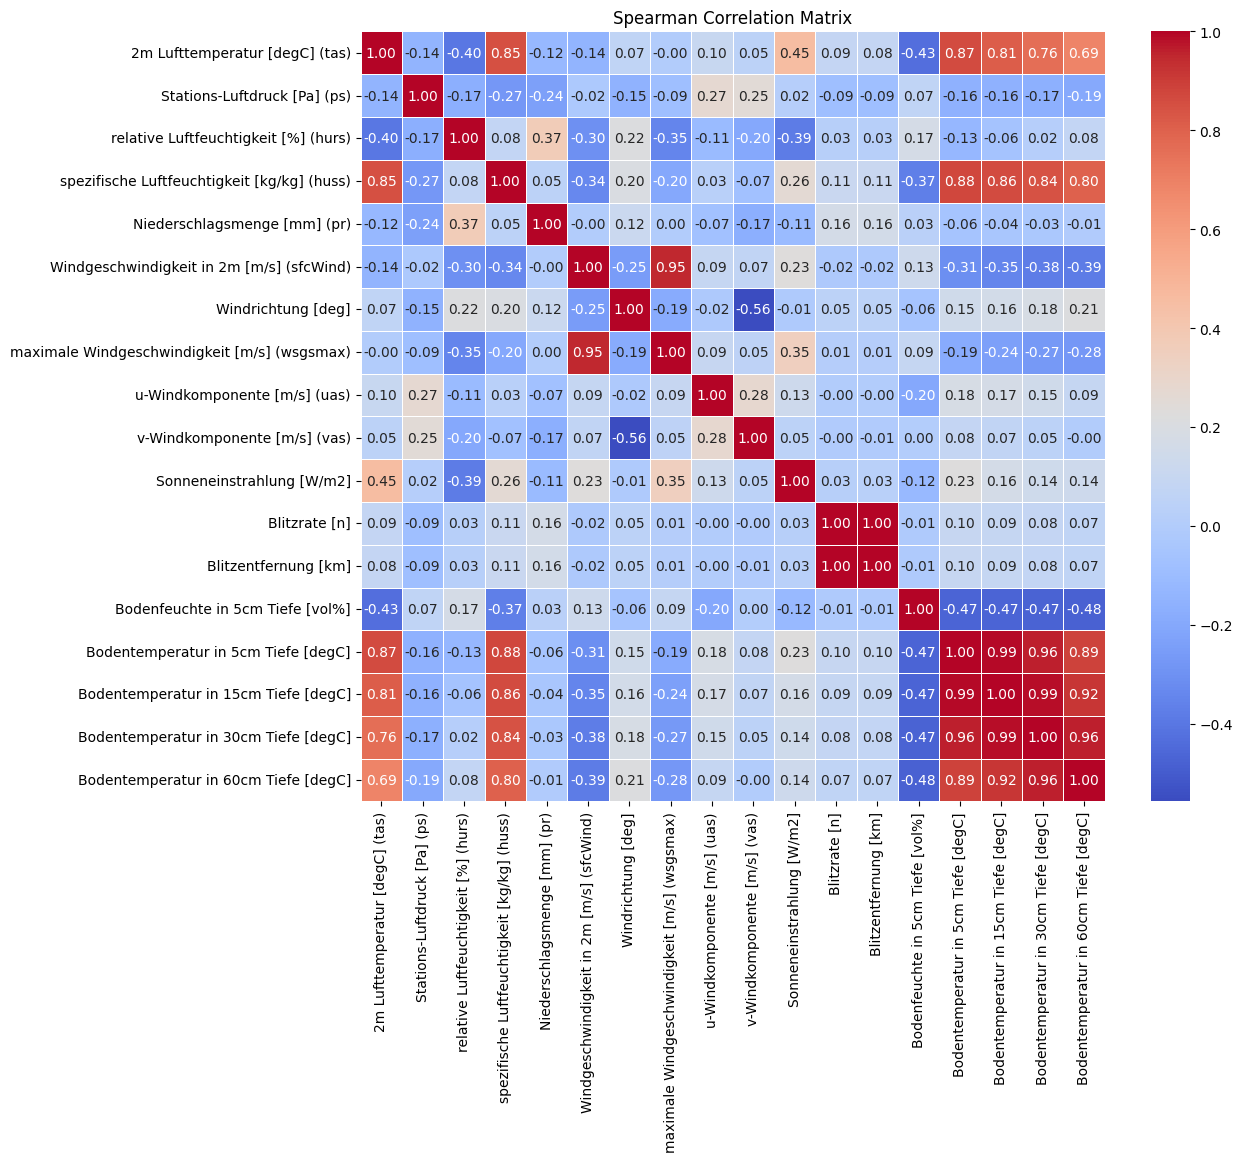

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
spearman_corr_matrix = df.corr(method='spearman')

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using Seaborn
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title
plt.title('Spearman Correlation Matrix')

# Show the plot
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Assuming 'df' is your DataFrame with the cleaned and numeric data
target_column = 'Bodenfeuchte in 5cm Tiefe [vol%]'

# Define features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Create a summary similar to R
X_train_sm = sm.add_constant(X_train)  # Add a constant for intercept term
sm_model = sm.OLS(y_train, X_train_sm).fit()

# Display summary
print(sm_model.summary())


Mean Squared Error: 38.34168051739963
                                   OLS Regression Results                                   
Dep. Variable:     Bodenfeuchte in 5cm Tiefe [vol%]   R-squared:                       0.383
Model:                                          OLS   Adj. R-squared:                  0.382
Method:                               Least Squares   F-statistic:                     328.4
Date:                              Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                                      13:02:13   Log-Likelihood:                -29235.
No. Observations:                              8994   AIC:                         5.851e+04
Df Residuals:                                  8976   BIC:                         5.863e+04
Df Model:                                        17                                         
Covariance Type:                          nonrobust                                         
                                

Mean Squared Error: 32.13131265040551


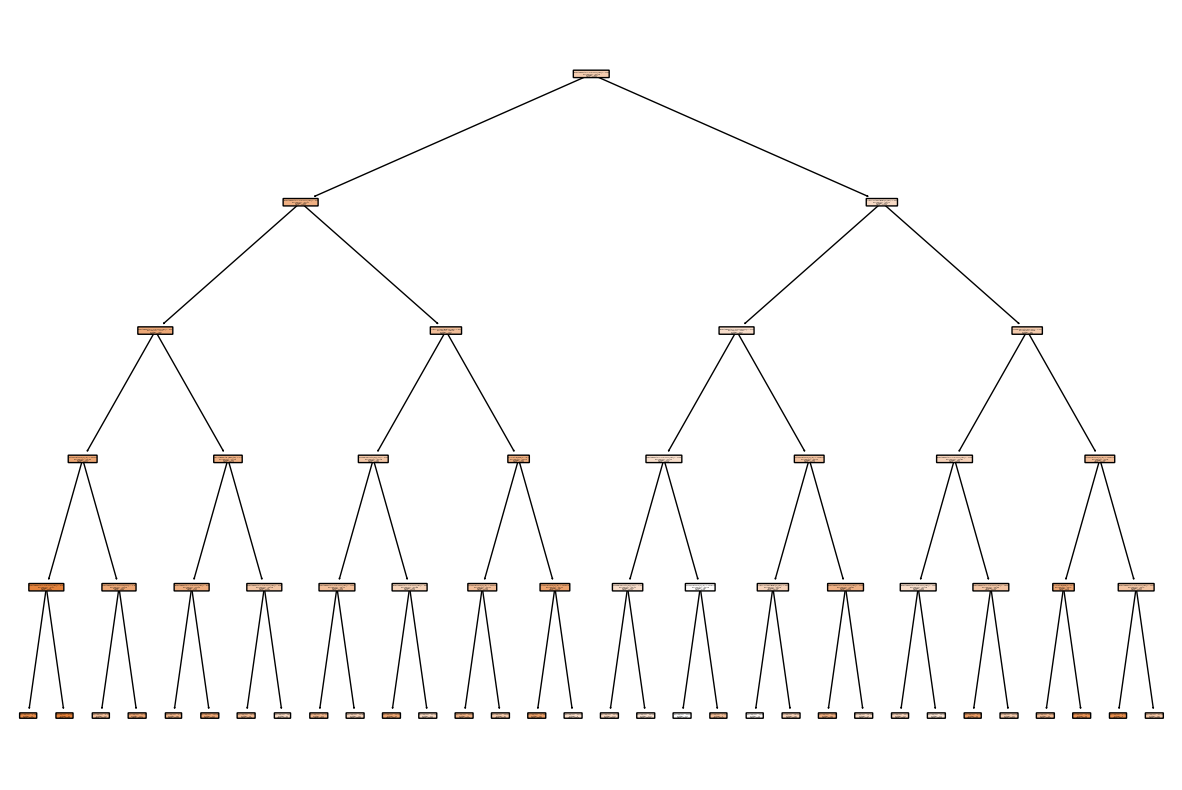

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame with the cleaned and numeric data
target_column = 'Bodenfeuchte in 5cm Tiefe [vol%]'

# Define features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Decision Tree Regressor model with max_depth=5
dt_model = DecisionTreeRegressor(max_depth=5)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame with the cleaned and numeric data
target_column = 'Bodenfeuchte in 5cm Tiefe [vol%]'

# Define features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize feature importance (optional)
feature_importance = rf_model.feature_importances_
feature_names = X.columns

# Sort feature importance in descending order
sorted_idx = feature_importance.argsort()[::-1]

# Print feature importance
print("Feature Importance:")
for i in sorted_idx:
    print(f"{feature_names[i]}: {feature_importance[i]}")


Mean Squared Error: 28.62500176666052
Feature Importance:
Bodentemperatur in 30cm Tiefe [degC]: 0.6294411918067543
Bodentemperatur in 60cm Tiefe [degC]: 0.09276077204190626
relative Luftfeuchtigkeit [%] (hurs): 0.07222995201315865
Bodentemperatur in 5cm Tiefe [degC]: 0.045177664250321985
Stations-Luftdruck [Pa] (ps): 0.04419459488401043
u-Windkomponente [m/s] (uas): 0.040768802449936824
Windrichtung [deg]: 0.028790807578815535
v-Windkomponente [m/s] (vas): 0.020848816171742154
Bodentemperatur in 15cm Tiefe [degC]: 0.013229692476960745
spezifische Luftfeuchtigkeit [kg/kg] (huss): 0.003638340029460111
2m Lufttemperatur [degC] (tas): 0.0035358395390778135
Sonneneinstrahlung [W/m2]: 0.0031266715483430547
Windgeschwindigkeit in 2m [m/s] (sfcWind): 0.0012383198205285567
maximale Windgeschwindigkeit [m/s] (wsgsmax): 0.0007572818349275363
Niederschlagsmenge [mm] (pr): 0.00023831154539584597
Blitzentfernung [km]: 2.294200866027393e-05
Blitzrate [n]: 0.0
